In [2]:
# source:
# https://towardsdatascience.com/7-functions-you-can-use-to-create-new-columns-in-a-pandas-dataframe-a6b480cf8b30
# https://www.sefidian.com/2021/02/19/pivot-melt-stack-and-unstack-methods-in-pandas/

import numpy as np
import pandas as pd
import datetime as dt

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#pd.options.display.float_format = '{:.4f}'.format   # 4 decimal places

In [3]:
df = pd.DataFrame({    "division": ["A", "B", "A", "C", "B"],
    "category": ["101-A", "14-C", "1020-D", "112-A", "11-A"],
    "date": pd.date_range(start='2022-09-01', end='2022-10-31', periods=5),
    "col1": np.random.randint(10, 70, size=5),
    "col2": np.random.randint(10, 30, size=5),
    "col3": np.random.randint(10, 100, size=5) 
})
df

,division,category,date,col1,col2,col3
0,A,101-A,2022-09-01,47,16,55
1,B,14-C,2022-09-16,68,15,46
2,A,1020-D,2022-10-01,52,23,61
3,C,112-A,2022-10-16,44,26,42
4,B,11-A,2022-10-31,40,18,74


In [4]:
# Pandas where --------------------------------------------------------------------------------------
# The where function of Pandas can be used for creating a column based on the values in other columns.
# We define a condition or a set of conditions and take a column. The values in this column remain the 
# same for the rows that fit the condition. The other values are replaced with the specified value.
df["col_updated"] = df["col1"].where(df["col2"] <= 50, df["col1"] + 10)

df[["col1", "col2", "col_updated"]]

,col1,col2,col_updated
0,47,16,47
1,68,15,68
2,52,23,52
3,44,26,44
4,40,18,40


In [5]:
# Numpy where --------------------------------------------------------------------------------------
# The where function of NumPy is more flexible than that of Pandas. We are able to assign a value for
# the rows that fit the given condition. This is not possible with the where function of Pandas as the 
# values that fit the condition remain the same.
df["col_updated_2"] = np.where( df["col2"] <= 50, 
                                df["col1"] - 10,
                                df["col1"] + 10)

df[["col1", "col2", "col_updated_2"]]

,col1,col2,col_updated_2
0,47,16,37
1,68,15,58
2,52,23,42
3,44,26,34
4,40,18,30


In [6]:
# Numpy select --------------------------------------------------------------------------------------
# The where function assigns a value based on one set of conditions. The select function takes it one 
# step further. It accepts multiple sets of conditions and is able to assign a different value for each set of conditions.
conditions = [  (df["division"] == "A") & (df["col1"] > 10),
                (df["division"] == "B") & (df["col1"] > 10)]

values = [1, 2]

df["select_col"] = np.select(conditions, values, default=0)
df[["division", "col1", "select_col"]]

,division,col1,select_col
0,A,47,1
1,B,68,2
2,A,52,1
3,C,44,0
4,B,40,2


In [7]:
# Pandas assign --------------------------------------------------------------------------------------
# The assign function of Pandas can be used for creating multiple columns in a single operation.
# We can derive columns based on the existing ones or create from scratch. If we do the latter, we need 
# to make sure the length of the variable is the same as the number of rows in the DataFrame
df = df.assign( cat1 = df["category"].str.split("-", expand=True)[0],
                col_all = lambda x: x.col1 ** 2 + x.col2 * 10 + x.col3,
                id = [1, 2, 3, 4, 5])

df

,division,category,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id
0,A,101-A,2022-09-01,47,16,55,47,37,1,101,2424,1
1,B,14-C,2022-09-16,68,15,46,68,58,2,14,4820,2
2,A,1020-D,2022-10-01,52,23,61,52,42,1,1020,2995,3
3,C,112-A,2022-10-16,44,26,42,44,34,0,112,2238,4
4,B,11-A,2022-10-31,40,18,74,40,30,2,11,1854,5


In [8]:
# Pandas insert --------------------------------------------------------------------------------------
# When we create a new column to a DataFrame, it is added at the end so it becomes the last column.
# The insert function allows for specifying the location of the new column in terms of the column index
df.insert(0, "id2", [1, 2, 3, 4, 5])

df

,id2,division,category,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id
0,1,A,101-A,2022-09-01,47,16,55,47,37,1,101,2424,1
1,2,B,14-C,2022-09-16,68,15,46,68,58,2,14,4820,2
2,3,A,1020-D,2022-10-01,52,23,61,52,42,1,1020,2995,3
3,4,C,112-A,2022-10-16,44,26,42,44,34,0,112,2238,4
4,5,B,11-A,2022-10-31,40,18,74,40,30,2,11,1854,5


In [9]:
# Pandas split --------------------------------------------------------------------------------------
# he split function is quite useful when working with textual data. Consider we have a text column that 
# contains multiple pieces of information. We can split it and create a separate column for each part.
df[["cat1","cat2"]] = df["category"].str.split("-", expand=True)

df[["category","cat1","cat2"]]

,category,cat1,cat2
0,101-A,101,A
1,14-C,14,C
2,1020-D,1020,D
3,112-A,112,A
4,11-A,11,A


In [10]:
# Pandas cat --------------------------------------------------------------------------------------
df.insert(3, "category2", df["cat1"].str.cat(df["cat2"], sep="|") )
df

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2
0,1,A,101-A,101|A,2022-09-01,47,16,55,47,37,1,101,2424,1,A
1,2,B,14-C,14|C,2022-09-16,68,15,46,68,58,2,14,4820,2,C
2,3,A,1020-D,1020|D,2022-10-01,52,23,61,52,42,1,1020,2995,3,D
3,4,C,112-A,112|A,2022-10-16,44,26,42,44,34,0,112,2238,4,A
4,5,B,11-A,11|A,2022-10-31,40,18,74,40,30,2,11,1854,5,A


In [11]:
# Unstack -----------------------------------------------------------------------------------------
df2 = df.copy()
df2.groupby('division')['cat2'].value_counts()

division  cat2
A         A       1
          D       1
B         A       1
          C       1
C         A       1
Name: cat2, dtype: int64

In [12]:
df2.groupby('division')['cat2'].value_counts().unstack().fillna(0)

cat2,A,C,D
division,,,
A,1.0,0.0,1.0
B,1.0,1.0,0.0
C,1.0,0.0,0.0


In [13]:
# diff() -----------------------------------------------------------------------------------------
# date difference by each division

df3 = df2[['id', 'category', 'division','date']].sort_values(by=['division','date'])
df3['time_diff'] = df3.groupby('division')['date'].diff()
df3

,id,category,division,date,time_diff
0,1,101-A,A,2022-09-01,NaT
2,3,1020-D,A,2022-10-01,30 days
1,2,14-C,B,2022-09-16,NaT
4,5,11-A,B,2022-10-31,45 days
3,4,112-A,C,2022-10-16,NaT


In [14]:
# cumsum + cumcount -------------------------------------------------------------------------------
# the cumulative by a specific column
df3 = df2[['id', 'category', 'cat2','date', 'col1']].sort_values(by=['cat2','date'])
df3['cumcol1'] = df3.groupby('cat2')['col1'].cumsum()
df3['countcat2'] = df3.groupby('cat2').cumcount()
df3

,id,category,cat2,date,col1,cumcol1,countcat2
0,1,101-A,A,2022-09-01,47,47,0
3,4,112-A,A,2022-10-16,44,91,1
4,5,11-A,A,2022-10-31,40,131,2
1,2,14-C,C,2022-09-16,68,68,0
2,3,1020-D,D,2022-10-01,52,52,0


In [15]:
# nsmallest + nlargest -----------------------------------------------------------------------------
df.nsmallest(3, 'col1')

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2
4,5,B,11-A,11|A,2022-10-31,40,18,74,40,30,2,11,1854,5,A
3,4,C,112-A,112|A,2022-10-16,44,26,42,44,34,0,112,2238,4,A
0,1,A,101-A,101|A,2022-09-01,47,16,55,47,37,1,101,2424,1,A


In [16]:
df.nlargest(2, 'col2')

,id2,division,category,category2,date,col1,col2,col3,col_updated,col_updated_2,select_col,cat1,col_all,id,cat2
3,4,C,112-A,112|A,2022-10-16,44,26,42,44,34,0,112,2238,4,A
2,3,A,1020-D,1020|D,2022-10-01,52,23,61,52,42,1,1020,2995,3,D


In [17]:
# Customise describe -----------------------------------------------------------------------------
display(df2.describe(include=['category', 'object']))       # categorical types
display(df2.describe(include=['number']))                   # numerical types

,division,category,category2,cat1,cat2
count,5,5,5,5,5
unique,3,5,5,5,3
top,A,101-A,101|A,101,A
freq,2,1,1,1,3


,id2,col1,col2,col3,col_updated,col_updated_2,select_col,col_all,id
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,3.000000,50.200000,19.600000,55.600000,50.200000,40.200000,1.20000,2866.200000,3.000000
std,1.581139,10.871982,4.722288,12.700394,10.871982,10.871982,0.83666,1167.117046,1.581139
min,1.000000,40.000000,15.000000,42.000000,40.000000,30.000000,0.00000,1854.000000,1.000000
25%,2.000000,44.000000,16.000000,46.000000,44.000000,34.000000,1.00000,2238.000000,2.000000
50%,3.000000,47.000000,18.000000,55.000000,47.000000,37.000000,1.00000,2424.000000,3.000000
75%,4.000000,52.000000,23.000000,61.000000,52.000000,42.000000,2.00000,2995.000000,4.000000
max,5.000000,68.000000,26.000000,74.000000,68.000000,58.000000,2.00000,4820.000000,5.000000


In [18]:
# Melt ----------------------------------------------------------------------------------
df4 = pd.melt(df,
        id_vars =['id', 'category'],
        value_vars =['col1', 'col2', 'col3'],
        value_name='values',
        var_name='cols').sort_values(by='category')

df4

,id,category,cols,values
0,1,101-A,col1,47
5,1,101-A,col2,16
10,1,101-A,col3,55
2,3,1020-D,col1,52
7,3,1020-D,col2,23
12,3,1020-D,col3,61
4,5,11-A,col1,40
9,5,11-A,col2,18
14,5,11-A,col3,74
3,4,112-A,col1,44


In [19]:
df5 = df4.pivot_table(index=['id', 'category'], columns='cols', values='values', aggfunc='sum').reset_index()
df5

cols,id,category,col1,col2,col3
0,1,101-A,47,16,55
1,2,14-C,68,15,46
2,3,1020-D,52,23,61
3,4,112-A,44,26,42
4,5,11-A,40,18,74


<AxesSubplot:xlabel='division,cat2'>

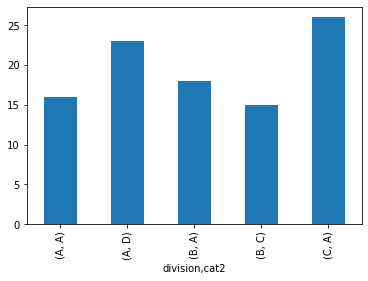

In [24]:
df2.groupby(['division', 'cat2'])['col2'].sum().plot(kind='bar')

<AxesSubplot:xlabel='division,cat2'>

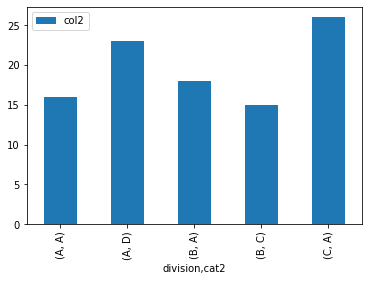

In [54]:
df2.pivot_table(index=['division', 'cat2'], values='col2', aggfunc='sum').plot(kind='bar')

<AxesSubplot:ylabel='col2'>

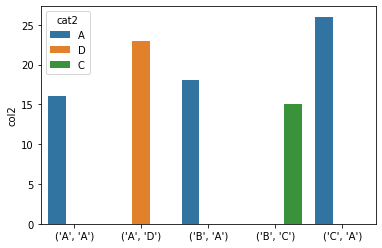

In [85]:
import seaborn as sns

pivot = df2.pivot_table(index=['division', 'cat2'], values='col2', aggfunc='sum').reset_index()
sns.barplot(x=pd.Series(zip(pivot['division'], pivot['cat2'])), y=pivot['col2'], hue=pivot['cat2'])

<AxesSubplot:xlabel='division', ylabel='col2'>

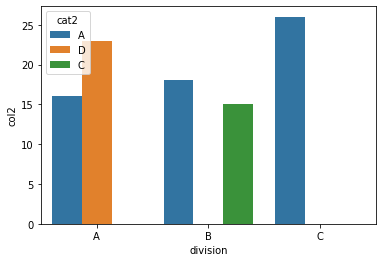

In [83]:
pivot = df2.pivot_table(index=['division', 'cat2'], values='col2', aggfunc='sum').reset_index()
sns.barplot(data=pivot, x='division', y='col2', hue='cat2')